In [43]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display
%matplotlib inline

In [44]:
data, sr = librosa.load('./wav/sa.wav', sr = None)
print(f'data : {data.shape}, sr : {sr}')

data : (20434,), sr : 16000


In [45]:
Audio = IPython.display.Audio(data = data, rate = sr)

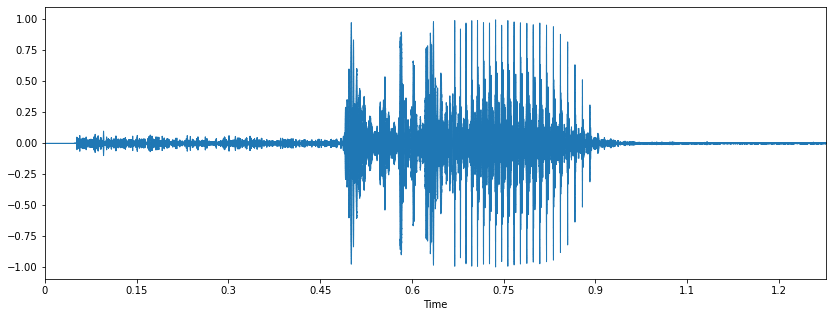

In [46]:
# librosa로 디스플레이 하기
plt.figure(figsize = (14,5))
plt.xlim(0,len(data)/sr, len(data))
librosa.display.waveshow(data, sr = sr)

(0.0, 1.277125)

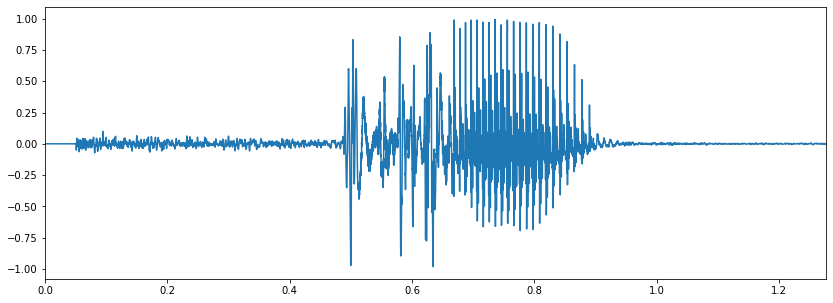

In [47]:
# np로 디스플레이하기
time = np.linspace(0, len(data) / sr, len(data)) # x축 범위 지정
plt.figure(figsize = (14,5))
plt.plot(time, data)
plt.xlabel = 'time'
plt.ylabel = 'amplitude'
plt.xlim(0, len(data)/sr)

In [48]:
frame_length = int(20/1000 * sr)
hop_length = int(10/1000 * sr)

print(f'frame length : {frame_length}, hop_length : {hop_length}')

frame length : 320, hop_length : 160


In [49]:
# Compute the short time energy
energy = np.array([sum(abs(data[i:i+frame_length]**2)) for i in range(0, len(data), hop_length)])
print(energy)


[0.00000000e+00 0.00000000e+00 0.00000000e+00 5.15628092e-07
 9.11848515e-02 1.83521250e-01 1.66535185e-01 2.35111607e-01
 3.02950606e-01 2.25831412e-01 1.79733579e-01 1.52573512e-01
 1.11882438e-01 1.35372268e-01 1.69445944e-01 1.61644048e-01
 2.28162238e-01 2.74982126e-01 2.11972484e-01 1.32295401e-01
 9.44687324e-02 7.23029368e-02 1.16659650e-01 1.75905514e-01
 1.12076256e-01 9.70170659e-02 8.91102052e-02 4.75816518e-02
 1.37360843e-01 1.90816284e-01 1.92728194e-01 1.89998761e-01
 1.49504313e-01 1.60216097e-01 1.33239917e-01 7.95575759e-02
 4.97697188e-02 6.95622984e-02 1.04750076e-01 1.16134708e-01
 7.50939058e-02 5.79058464e-02 6.27321595e-02 5.52406249e-02
 6.37854326e-02 7.30652934e-02 8.97828131e-02 2.70517418e-01
 2.32207009e+01 5.42142249e+01 4.28469604e+01 1.70824894e+01
 6.79775308e+00 3.99675557e+00 1.18124171e+01 1.03589193e+01
 7.72190716e+00 3.92029234e+01 3.54557490e+01 1.59595293e+01
 1.49611532e+01 3.54210819e+01 6.98468868e+01 4.93727714e+01
 1.61554310e+01 1.413441

In [50]:
# librosa.feature.rms(*, y=None, S=None, frame_length=2048, hop_length=512, center=True, pad_mode='constant')
# => compute root-mean-square (RMS) value for each frame, either from the audio samples y or from a spectrogram S.
sa_rms = librosa.feature.rms(data, frame_length = 320, hop_length = 160)
# overlap 50%를 위해서 frame_length = hop_length * 2로 설정해두기/ fft아니므로 굳이 2의 N승 해줄 필요는 없음

C:\Users\yukeun\AppData\Local\Temp\ipykernel_6084\4058659152.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00031071 -0.00040861
 -0.00024965] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  sa_rms = librosa.feature.rms(data, frame_length = 320, hop_length = 160)


In [51]:
print(sa_rms.shape)
print(sa_rms)
print(sa_rms[0].shape)
sa_rms = sa_rms[0] # 대괄호 두개일 때 axis = 0은 대괄호 안 첫번째 요소이다.

(1, 128)
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 4.0141473e-05
  1.6880540e-02 2.3947941e-02 2.2812771e-02 2.7105790e-02 3.0768827e-02
  2.6565451e-02 2.3699524e-02 2.1835573e-02 1.8698467e-02 2.0567896e-02
  2.3011269e-02 2.2475267e-02 2.6702190e-02 2.9314145e-02 2.5737405e-02
  2.0332810e-02 1.7181816e-02 1.5031523e-02 1.9093491e-02 2.3445783e-02
  1.8714655e-02 1.7412016e-02 1.6687403e-02 1.2193960e-02 2.0718412e-02
  2.4419272e-02 2.4541305e-02 2.4366908e-02 2.1614831e-02 2.2375776e-02
  2.0405261e-02 1.5767606e-02 1.2471181e-02 1.4743886e-02 1.8092651e-02
  1.9050485e-02 1.5318892e-02 1.3451980e-02 1.4001357e-02 1.3138758e-02
  1.4118410e-02 1.5110561e-02 1.6750263e-02 2.9075196e-02 2.6937833e-01
  4.1160595e-01 3.6591905e-01 2.3104712e-01 1.4574972e-01 1.1175805e-01
  1.9212966e-01 1.7992115e-01 1.5534143e-01 3.5001305e-01 3.3286515e-01
  2.2332382e-01 2.1622583e-01 3.3270240e-01 4.6719539e-01 3.9279756e-01
  2.2469027e-01 2.1016669e-01 2.5177184e-01 2.3584427e-

In [52]:
# frame단위를 time으로 나타내기 (frame to time)
frames = range(len(energy))
time = librosa.frames_to_time(frames, hop_length = hop_length)
print(energy.shape)
print(sa_rms.shape)


(128,)
(128,)


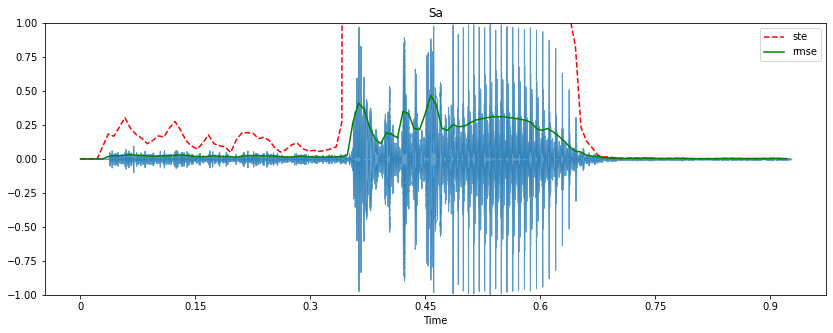

In [53]:
plt.figure(figsize=(14,5))
librosa.display.waveshow(data, alpha = 0.7)
plt.plot(time, energy, color = 'r', linestyle = '--',label = 'ste')
plt.plot(time, sa_rms, color = 'g', label = 'rmse')
plt.title('Sa')
plt.xlabel = 'time'
plt.ylabel = 'amplitude'
plt.ylim(-1,1)
plt.legend()

In [54]:
# zero crossing rate
zcr = librosa.feature.zero_crossing_rate(data, frame_length = frame_length, hop_length = hop_length)
zcr.shape

(1, 128)

In [55]:
zcr = zcr[0]
zcr.shape

(128,)

(0.0, 1.0)

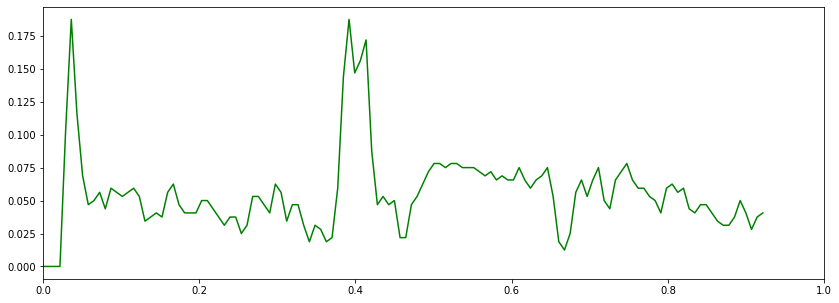

In [56]:
# Visualize the zero crossing rate in all time speech pieces
frames = range(len(zcr))
time_in_zcr = librosa.frames_to_time(frames, hop_length = hop_length)

plt.figure(figsize=(14,5))
plt.plot(time_in_zcr, zcr, color = 'g', label = 'zcr')
plt.xlabel = 'time(s)'
plt.xlim(0,1)